# Ramer-Douglas-Peucker Algorithm

Implented by: Mehrdad Pourfathi

Date: 9/28/2020


In [13]:
# import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import itertools

from numpy import exp, pi, cos

### Algorithm Implementation

In [296]:
def rdp(data, epsilon):
    ''' Runs ramer-douglas-peucker curve estimation algorithm.
    Args:
        data: 2D array of x and y data.
        epsilon: distance threshold.
    Return:
        2D array of the estimated curve.
    '''
    # if only two points are left return them.
    if len(data) == 2:
        return np.stack([data[0,:], data[-1,:]])

    first_point = data[0,:]
    last_point = data[-1,:]
    
    max_d = float('-inf')
    max_i = 0

    for i in range(1,len(data)-1):
        # current distance
        d = point_to_line_distance(first_point, last_point, data[i,:])
        # find max distance and its index
        if d > max_d:
            max_d = d
            max_i = i 

    if max_d > epsilon:
        left_array = rdp(data[:max_i+1,:], epsilon)
        right_array = rdp(data[max_i:,:], epsilon)
        return np.concatenate((left_array, right_array))
    else:
        return np.stack([data[0,:], data[-1,:]])


def point_to_line_distance(p1, p2, p3):
    ''' Measures the sitance between point p3 a a line formed by connecting p1 and p2.
    Args:
        p1, p2, p3: 2D coorinants of points
    Return:
        d: scalar that is distance between point p3 and p2-p1 line.
    '''
    proj = np.inner(p2-p1, p3-p1) / np.linalg.norm(p2-p1)
    d = np.sqrt(np.linalg.norm(p3-p1)**2 - proj**2)

    return d

### Test Case 1

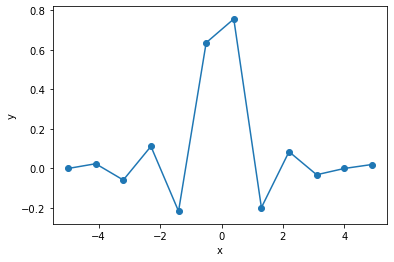

In [321]:
# create test data 1
x = np.arange(-5,5, 0.9).reshape(-1,1)
y = np.sinc(x)
data = np.hstack((x,y))
# create test data 1
plt.scatter(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [329]:
# fine esimate
small_epsilon_estimate = rdp(data, epsilon=0.01)
# course esimate
large_epsilon_estimate = rdp(data, epsilon=0.2)

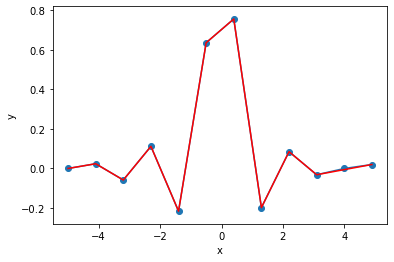

In [330]:
# show fine esimate
plt.scatter(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,1])
plt.plot(small_epsilon_estimate[:,0], small_epsilon_estimate[:,1],c=(1,0,0))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

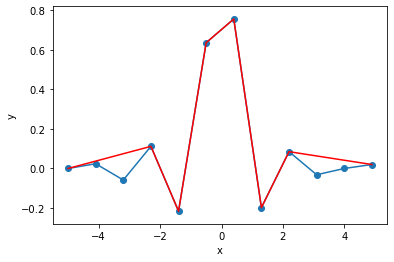

In [332]:
# show course esimate
plt.scatter(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,1])
plt.plot(large_epsilon_estimate[:,0], large_epsilon_estimate[:,1],c=(1,0,0))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Test Case 2

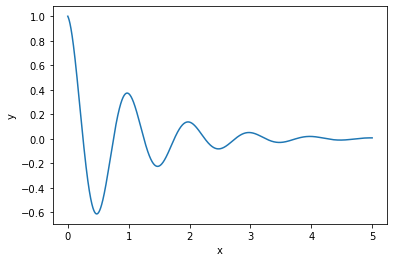

In [333]:
# create test data 2 (example from wikipedia)
x = np.arange(0,5, 0.001).reshape(-1,1)
y = exp(-x) * cos(2*pi*x).reshape(-1,1)
data = np.hstack((x,y))
# show graph
plt.plot(data[:,0], data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [376]:
# very course esimate
very_course_estimate = rdp(data, epsilon=2)

# course esimate
course_estimate = rdp(data, epsilon=0.05)

# fine esimate
fine_estimate = rdp(data, epsilon=0.005)

# very fine estimate
very_fine_estimate = rdp(data, epsilon=0.00001)

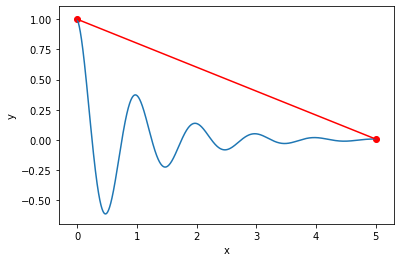

In [377]:
# very course esimate
plt.plot(data[:,0], data[:,1])
plt.plot(very_course_estimate[:,0], very_course_estimate[:,1], c='red')
plt.scatter(very_course_estimate[:,0], very_course_estimate[:,1], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

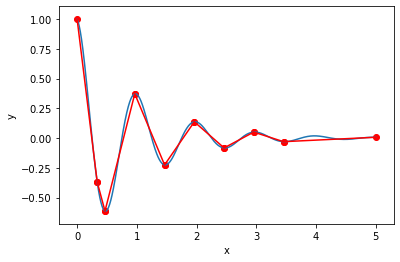

In [378]:
# course esimate
plt.plot(data[:,0], data[:,1])
plt.plot(course_estimate[:,0], course_estimate[:,1], c='red')
plt.scatter(course_estimate[:,0], course_estimate[:,1], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

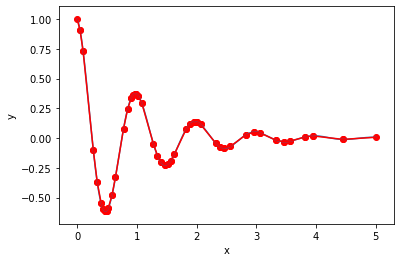

In [379]:
# fine esimate
plt.plot(data[:,0], data[:,1])
plt.plot(fine_estimate[:,0], fine_estimate[:,1], c='red')
plt.scatter(fine_estimate[:,0], fine_estimate[:,1], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

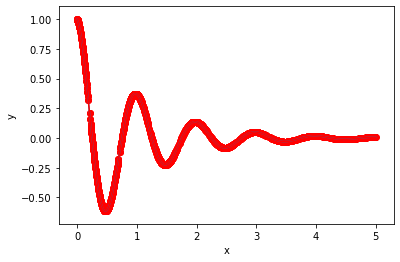

In [380]:
# very fine esimate
plt.plot(data[:,0], data[:,1])
plt.plot(very_fine_estimate[:,0], very_fine_estimate[:,1], c='red')
plt.scatter(very_fine_estimate[:,0], very_fine_estimate[:,1], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()